In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

C:\Users\chimi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\chimi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\chimi\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\chimi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\chimi\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary inco

In [2]:
insurance_claimsdf = pd.read_csv('C:/Users/chimi/Desktop/Python Data Science Projects/insurance_claim/data/insurance_claims.csv')

In [3]:
# Shape of the dataset
insurance_claimsdf.shape

(1000, 40)

In [4]:
# Display the first few rows and summary information about the dataset
display_info = {
    'head' : insurance_claimsdf.head(),
    'info' : insurance_claimsdf.info()  
    
}
display_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

{'head':    months_as_customer  age  policy_number policy_bind_date policy_state  \
 0                 328   48         521585       2014-10-17           OH   
 1                 228   42         342868       2006-06-27           IN   
 2                 134   29         687698       2000-09-06           OH   
 3                 256   41         227811       1990-05-25           IL   
 4                 228   44         367455       2014-06-06           IL   
 
   policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
 0    250/500               1000                1406.91               0   
 1    250/500               2000                1197.22         5000000   
 2    100/300               2000                1413.14         5000000   
 3    250/500               2000                1415.74         6000000   
 4   500/1000               1000                1583.91         6000000   
 
    insured_zip  ... police_report_available total_claim_amount injury_claim  \
 0

In [5]:
# Columns of the dataframe
insurance_claimsdf.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
# Looking at number of unique policies
# All the policies are unique.
# Trying to see if they were any duplicate policies
insurance_claimsdf['policy_number'].nunique()

1000

In [7]:
# Check for duplicates

duplicate_rows = insurance_claimsdf.duplicated().sum()

duplicate_rows

0

In [8]:
# Check for missing values
insurance_claimsdf.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [9]:
# Check for missing values in each column
missing_values = insurance_claimsdf.isnull().sum()

missing_values[missing_values > 0]


authorities_contacted      91
_c39                     1000
dtype: int64

In [10]:
# The only column that has missing value is c39-all the 1000 rows are missing in this column
# Drop the column
insurance_claimsdf.drop('_c39', axis=1, inplace=True)

In [11]:
# Data Type correction
insurance_claimsdf['policy_bind_date'] = pd.to_datetime(insurance_claimsdf['policy_bind_date'])
insurance_claimsdf['incident_date'] = pd.to_datetime(insurance_claimsdf['incident_date'])


In [12]:
# Check to see if the categorical variables are correctly identified as categorical datatypes
insurance_claimsdf['insured_zip'] = insurance_claimsdf['insured_zip'].astype(str)
insurance_claimsdf['auto_year'] = insurance_claimsdf['auto_year'].astype(str)

insurance_claimsdf[['insured_zip','auto_year']].dtypes

insured_zip    object
auto_year      object
dtype: object

#### Feature Engineering

In [13]:
# Convert date columns to datetime
insurance_claimsdf['policy_bind_date'] = pd.to_datetime(insurance_claimsdf['policy_bind_date'])
insurance_claimsdf['incident_date'] = pd.to_datetime(insurance_claimsdf['incident_date'])

# Calculate the number of days between policy bind date and incident date
insurance_claimsdf['days_between_policy_incident'] = (insurance_claimsdf['incident_date'] - insurance_claimsdf['policy_bind_date']).dt.days

##### Adding to capture any seasonal fraud or incident season fraud to see if any seasonal spike would impact fraud cases

In [14]:
# Function to determine the part of the day
def get_part_of_day(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'
    else:
        return 'Night'

# Function to determine season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'
    else:
        return 'Winter'

insurance_claimsdf['part_of_day'] = insurance_claimsdf['incident_hour_of_the_day'].apply(get_part_of_day)
insurance_claimsdf['incident_season'] = insurance_claimsdf['incident_date'].dt.month.apply(get_season)

In [15]:
# Initialize encoders
label_encoder = LabelEncoder()
binary_encoder = BinaryEncoder()  # This will be used specifically for high-cardinality nominal variables

# Label Encoding for binary categorical variables
insurance_claimsdf['insured_sex'] = label_encoder.fit_transform(insurance_claimsdf['insured_sex'])
insurance_claimsdf['property_damage'] = label_encoder.fit_transform(insurance_claimsdf['property_damage'])
insurance_claimsdf['police_report_available'] = label_encoder.fit_transform(insurance_claimsdf['police_report_available'])
insurance_claimsdf['fraud_reported'] = label_encoder.fit_transform(insurance_claimsdf['fraud_reported'])

In [16]:
# Define the order and corresponding mapping manually
education_mapping = {
    'High School': 0,  # Assuming high school as the base level of formal education
    'College': 1,      # Typically refers to some college coursework but less than an associate's degree
    'Associate': 2,    # An associate's degree is generally considered above 'some college' but below a bachelor's degree
    'Masters': 3,      # A graduate level degree, following a bachelor's
    'JD': 4,           # Professional degree, often considered parallel to a master's in terms of years of study
    'MD': 5,           # Professional degree, represents a high level of specialization post-graduate
    'PhD': 6           # The highest academic degree awarded by universities in most fields
}

# Apply the mapping to the column
insurance_claimsdf['insured_education_level'] = insurance_claimsdf['insured_education_level'].map(education_mapping)

# Verify the mapping
print(insurance_claimsdf['insured_education_level'].head())

0    5
1    5
2    6
3    6
4    2
Name: insured_education_level, dtype: int64


In [17]:
# Define the order and corresponding manual mapping
severity_mapping = {
    'Trivial Damage': 0,   # Least severe
    'Minor Damage': 1,     # More severe than trivial but less than major
    'Major Damage': 2,     # More severe than minor
    'Total Loss': 3        # Most severe
}

# Apply the mapping to the incident_severity column
insurance_claimsdf['incident_severity'] = insurance_claimsdf['incident_severity'].map(severity_mapping)

# Check to ensure the mapping has been applied correctly
print(insurance_claimsdf[['incident_severity']].head())
print(insurance_claimsdf['incident_severity'].value_counts())

   incident_severity
0                  2
1                  1
2                  1
3                  2
4                  1
incident_severity
1    354
3    280
2    276
0     90
Name: count, dtype: int64


In [18]:
# Initialize label encoder
label_encoder = LabelEncoder()

# Apply label encoding to each of the high cardinality nominal variables
insurance_claimsdf['insured_occupation'] = label_encoder.fit_transform(insurance_claimsdf['insured_occupation'])
insurance_claimsdf['insured_hobbies'] = label_encoder.fit_transform(insurance_claimsdf['insured_hobbies'])
insurance_claimsdf['incident_city'] = label_encoder.fit_transform(insurance_claimsdf['incident_city'])
insurance_claimsdf['auto_make'] = label_encoder.fit_transform(insurance_claimsdf['auto_make'])
insurance_claimsdf['auto_model'] = label_encoder.fit_transform(insurance_claimsdf['auto_model'])

In [19]:
# Use pd.get_dummies to encode these and update the dataframe
columns_to_encode = ['policy_state', 'policy_csl', 'insured_relationship', 'incident_type', 'collision_type', 
                     'authorities_contacted', 'incident_state', 'part_of_day', 'incident_season']
    
# Apply pd.get_dummies to encode these columns and update the dataframe
insurance_claimsdf = pd.get_dummies(insurance_claimsdf, columns=columns_to_encode, dtype=int)

# Display the DataFrame to verify the changes
print(insurance_claimsdf.head())


   months_as_customer  age  policy_number policy_bind_date  policy_deductable  \
0                 328   48         521585       2014-10-17               1000   
1                 228   42         342868       2006-06-27               2000   
2                 134   29         687698       2000-09-06               2000   
3                 256   41         227811       1990-05-25               2000   
4                 228   44         367455       2014-06-06               1000   

   policy_annual_premium  umbrella_limit insured_zip  insured_sex  \
0                1406.91               0      466132            1   
1                1197.22         5000000      468176            1   
2                1413.14         5000000      430632            0   
3                1415.74         6000000      608117            0   
4                1583.91         6000000      610706            1   

   insured_education_level  ...  incident_state_PA  incident_state_SC  \
0                        

In [20]:
# Dropping 'auto_model', 'auto_year' for too many unique values-
insurance_claimsdf.drop(columns=['policy_bind_date','auto_year','incident_date','incident_location','insured_zip'], axis=1, inplace=True)

#### Building a base model with logistic regression

In [21]:

X = insurance_claimsdf.drop('fraud_reported', axis=1)
y = insurance_claimsdf['fraud_reported']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:


# Initialize and train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train, y_train)

# Predict on the test set
y_pred = logistic_model.predict(X_test)
y_pred_proba = logistic_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



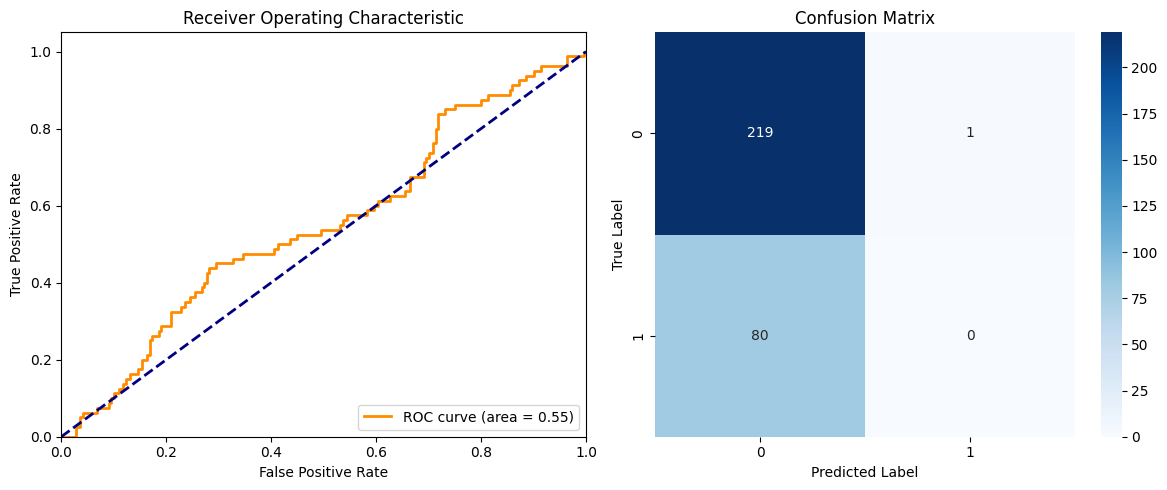

In [23]:
# Calculate ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure(figsize=(12, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

# Plot Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()


#### Running cross validation to find the best performing model

In [24]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}
kf = KFold(n_splits=5, random_state=42, shuffle=True)  # 5-fold cross-validation

for name, model in models.items():
    cv_scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    results[name] = cv_scores
    print(f"{name}: Mean CV Accuracy: {np.mean(cv_scores):.4f}, Standard Deviation: {np.std(cv_scores):.4f}")


C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Logistic Regression: Mean CV Accuracy: 0.7520, Standard Deviation: 0.0306
Decision Tree: Mean CV Accuracy: 0.7840, Standard Deviation: 0.0332
Random Forest: Mean CV Accuracy: 0.7530, Standard Deviation: 0.0314
AdaBoost: Mean CV Accuracy: 0.7880, Standard Deviation: 0.0325
Gradient Boosting: Mean CV Accuracy: 0.8020, Standard Deviation: 0.0306


C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


XGBoost: Mean CV Accuracy: 0.8030, Standard Deviation: 0.0361


####  
- From the above, XGBOOST is the best performing model.

In [25]:


# Initialize dictionary to store results
results = {'Model': [], 'Mean CV Accuracy': [], 'Standard Deviation': [], 'Mean Precision': [], 'Mean Recall': [], 'Mean F1-score': []}

# Define KFold cross-validator
kf = KFold(n_splits=5, random_state=42, shuffle=True)

for name, model in models.items():
    # Perform cross-validation
    cv_accuracy = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    cv_precision = cross_val_score(model, X, y, cv=kf, scoring='precision')
    cv_recall = cross_val_score(model, X, y, cv=kf, scoring='recall')
    cv_f1 = cross_val_score(model, X, y, cv=kf, scoring='f1')
    
    # Update results dictionary
    results['Model'].append(name)
    results['Mean CV Accuracy'].append(np.mean(cv_accuracy))
    results['Standard Deviation'].append(np.std(cv_accuracy))
    results['Mean Precision'].append(np.mean(cv_precision))
    results['Mean Recall'].append(np.mean(cv_recall))
    results['Mean F1-score'].append(np.mean(cv_f1))
    
    # Print results
    print(f"{name}: Mean CV Accuracy: {np.mean(cv_accuracy):.4f}, Standard Deviation: {np.std(cv_accuracy):.4f}, Mean Precision: {np.mean(cv_precision):.4f}, Mean Recall: {np.mean(cv_recall):.4f}, Mean F1-score: {np.mean(cv_f1):.4f}")

C:\Users\chimi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression: Mean CV Accuracy: 0.7520, Standard Deviation: 0.0306, Mean Precision: 0.3000, Mean Recall: 0.0128, Mean F1-score: 0.0244
Decision Tree: Mean CV Accuracy: 0.7840, Standard Deviation: 0.0388, Mean Precision: 0.5604, Mean Recall: 0.5787, Mean F1-score: 0.5587
Random Forest: Mean CV Accuracy: 0.7510, Standard Deviation: 0.0360, Mean Precision: 0.5267, Mean Recall: 0.0573, Mean F1-score: 0.0688
AdaBoost: Mean CV Accuracy: 0.7880, Standard Deviation: 0.0325, Mean Precision: 0.6035, Mean Recall: 0.4020, Mean F1-score: 0.4810
Gradient Boosting: Mean CV Accuracy: 0.8000, Standard Deviation: 0.0308, Mean Precision: 0.6336, Mean Recall: 0.5052, Mean F1-score: 0.5561


C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.p

XGBoost: Mean CV Accuracy: 0.8030, Standard Deviation: 0.0361, Mean Precision: 0.6304, Mean Recall: 0.5261, Mean F1-score: 0.5687


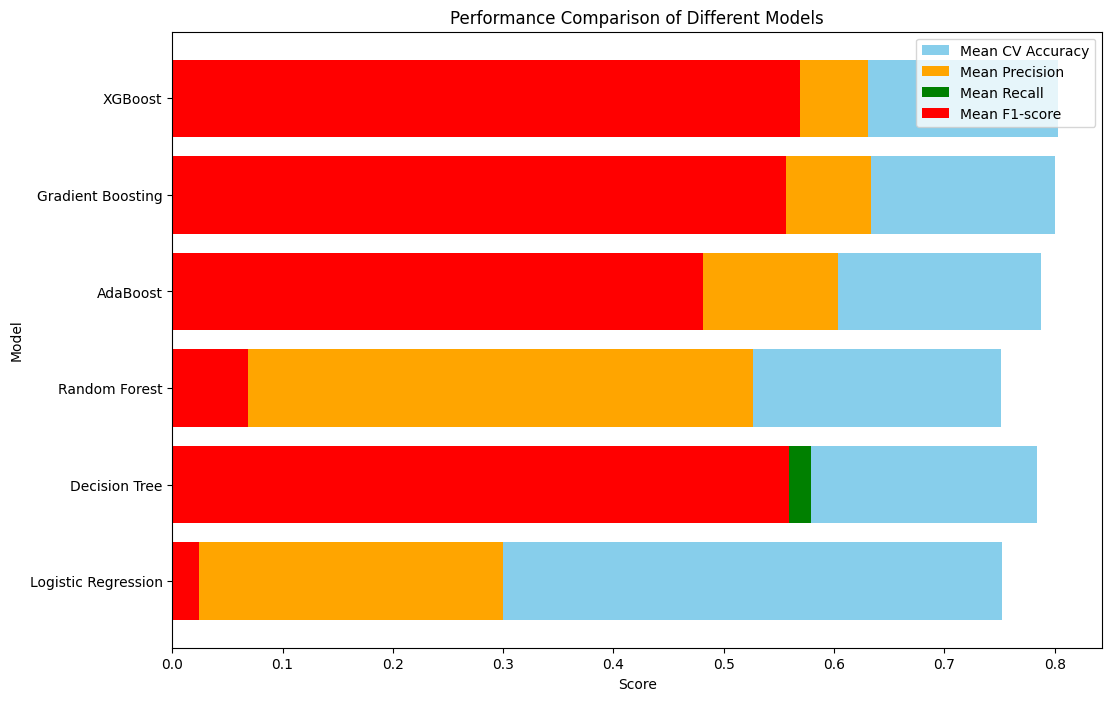

In [26]:
# Define the models and corresponding metrics
models = results['Model']
accuracy = results['Mean CV Accuracy']
precision = results['Mean Precision']
recall = results['Mean Recall']
f1_score = results['Mean F1-score']

# Plot the results
plt.figure(figsize=(12, 8))

# Mean CV Accuracy
plt.barh(models, accuracy, color='skyblue', label='Mean CV Accuracy')
# Mean Precision
plt.barh(models, precision, color='orange', label='Mean Precision')
# Mean Recall
plt.barh(models, recall, color='green', label='Mean Recall')
# Mean F1-score
plt.barh(models, f1_score, color='red', label='Mean F1-score')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Model')
plt.title('Performance Comparison of Different Models')
plt.legend()

# Show plot
plt.show()

##### Building XGBOOST Model

In [27]:
# Define XGBClassifier model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the XGBClassifier model on the training set
xgb_model.fit(X_train, y_train)

# Predict on the testing set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
test_precision = precision_score(y_test, y_pred)
print(f"Precision Score: {test_precision:.4f}")

Test Accuracy: 0.7567
Precision Score: 0.5574


C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


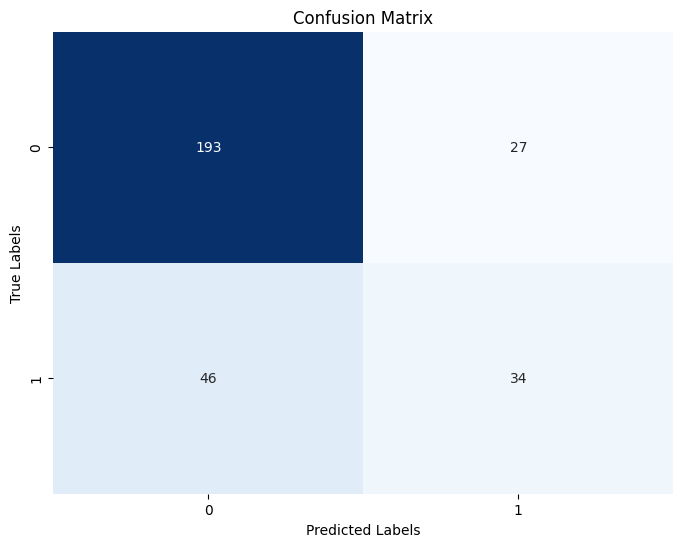

In [28]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [29]:

# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
    # Add more hyperparameters as needed
}

# Define XGBClassifier model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='precision')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
test_precision = precision_score(y_test, y_pred)
print(f"Precision Score on Test Set: {test_precision:.4f}")


C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.p

C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.p

C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.p

C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\chimi\anaconda3\lib\site-packages\xgboost\sklearn.p

Best Hyperparameters: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 100}
Precision Score on Test Set: 0.6032


#### XG-Boost might perform better in accuracy but has low precision value. However, we used hyperparameter to improve the Precision Score.

In [31]:
feature_importances = best_model.feature_importances_

features = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

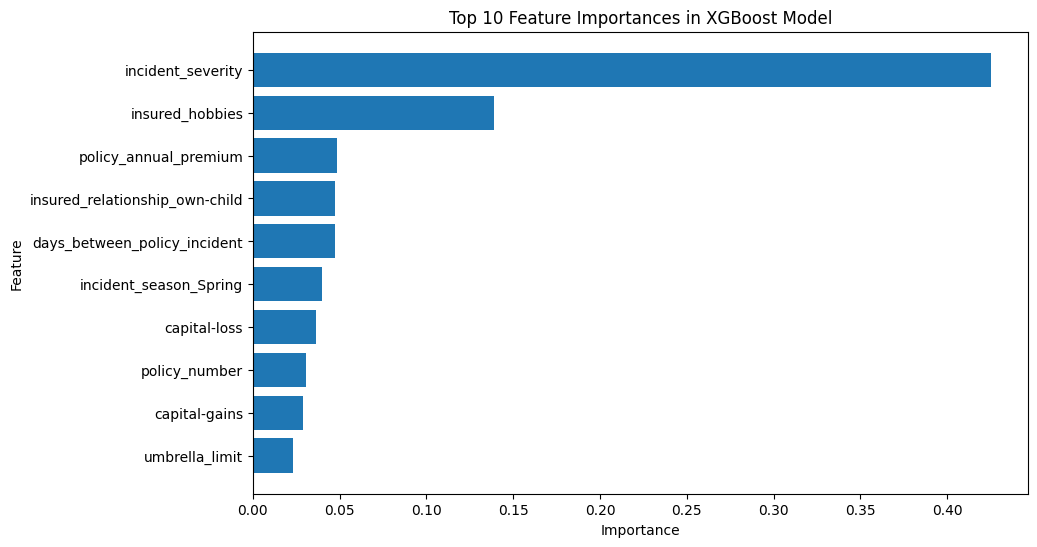

In [32]:
top_features = features.sort_values(by='Importance', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances in XGBoost Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the feature with the highest importance at the top
plt.show()


### 
- The EDA using the chi-square test revealed an association between incident_severity and fraudulent claims, a finding that has been corroborated by the feature_importance results from our model. This validates the initial assumption that warranted further exploration.